(278, 245)
(278, 245)
(278, 245)
_______________
(371, 364)
(278, 245)
(278, 245)
(371, 364)
restoration error for image a : 0.001258
restoration error for image b : 0.005011


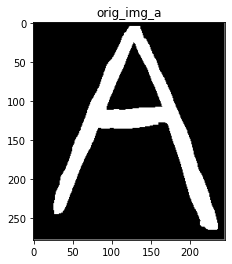

In [3]:
# CMPT 727 PA2
# Gibbs sampling algorithm to denoise an image
# Author : Gunaa AV, Isaac Caswell
# Edits : Heng Liu
# Date : 3/1/2020

import math
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

MAX_BURNS = 50
MAX_SAMPLES = 200
ETA = 1
BETA = 1


def denoise_image(filename, initialization='rand', logfile=None):
  '''
   TODO
   Do Gibbs sampling and compute the energy of each assignment for the image
   specified in filename.
   It should run MAX_BURNS iterations of burn in and then
   MAX_SAMPLES iterations for collecting samples.
   It is highly recommended to break the implementation in separate functions.
   And only use this function as a wrapper function.
   filename: file name of image in txt
   initialization: 'same' or 'neg' or 'rand'
   logfile: the file name that stores the energy log (will use for plotting
       later) look at the explanation of plot_energy to see detail
   For Q2:
    A log file with file name taken from the value of logfile should be created
   For Q3:
   return value: denoised
       denoised: a 2d-array with the same size of the image, the value of each entry
           should be either 0(black) or 1(white).
         This value is calculated based on the posterior probability of that being 1 (estimated by the Gibbs
           sampler).
  '''
  y = read_txt_file(filename)

  B = 50
  S = 200
  beta =1
  etta = 1
  
  str1=[]
  str2=[]
  str3=[]
  total_samples = np.zeros(y.shape)
  x = np.copy(y)
  if initialization == 'rand':
      #new_y = np.random.choice([1, -1], size=((y.shape[0]-1-1)*(y.shape[1]-1-1)))
      new_y= np.random.choice([1, -1], size=((y.shape[0]-1-1)*(y.shape[1]-1-1)))
      
  elif(initialization == 'neg'):
      new_y = -y[np.where(y != 0)]
  else:
      new_y = y[np.where(y != 0)]
  #print("akbar")
  #print(new_y.shape)
  y[np.where(y != 0)]= new_y
  #y[np.where(y != 0)] =np.reshape(new_y,(y.shape[0]-2*y.shape[1]-2,1))
  #print("asghar")
  if(logfile != None):
      with open(logfile, 'w') as log:
          for epoch in range(B):
              for column in range(y.shape[0]-1):
                  for row in range(y.shape[1]-1):
                      if(0 < column and 0 < row ):
                          neighbours = []
                          neighbours.append(y[column-1][row])
                          neighbours.append(y[column][row-1])
                          neighbours.append(y[column][row+1])
                          neighbours.append(y[column+1][row])
                          neighbours.append(x[column][row])
                          probalility_y1 = np.exp(2*beta*(sum(neighbours)))/(1+np.exp(2*beta*(sum(neighbours))))
                          if random.random() < probalility_y1:
                              y[column][row] = 1
                          else:
                              y[column][row] = -1
              if(logfile != None):
                  str1 = epoch+1
                  str2 = "B"
                  str3 = (-1*(np.sum(x*y) + np.sum(y[:y.shape[0]-1, :]*y[1:, :])+ np.sum(y[:, :y.shape[1]-1]*y[:, 1:])))
                  log.write("\t".join(map(str, [str1, str3, str2])) + "\n")
          for epoch in range(S):
              y_sample = np.zeros(y.shape)
              for column in range(y.shape[0]-1):
                  for row in range(y.shape[1]-1):
                      if(0 < column and 0 < row ):
                          neighbours = []
                          neighbours.append(y[column-1][row])
                          neighbours.append(y[column][row-1])
                          neighbours.append(y[column][row+1])
                          neighbours.append(y[column+1][row])
                          neighbours.append(x[column][row])
                          probalility_y1 = np.exp(2*beta*(sum(neighbours)))/(1+np.exp(2*beta*(sum(neighbours))))
                          if random.random() < probalility_y1:
                              y_sample[column][row] = 1
                          else:
                              y_sample[column][row] = -1
              total_samples = total_samples+(y_sample==1)
              if(logfile != None):
                  str1 = B+epoch+1
                  str2 = "S"
                  str3 = (-1*(np.sum(x*y_sample) + np.sum(y_sample[:y_sample.shape[0]-1, :]*y_sample[1:, :])+ np.sum(y_sample[:, :y_sample.shape[1]-1]*y_sample[:, 1:])))
                  log.write("\t".join(map(str, [str1, str3, str2])) + "\n")
              #y=y_sample
      return total_samples/S     
  else:
      for epoch in range(B):
          #print(epoch)
          for column in range(y.shape[0]-1):
              for row in range(y.shape[1]-1):
                  if(0 < column and 0 < row ):
                      neighbours = []
                      neighbours.append(y[column-1][row])
                      neighbours.append(y[column][row-1])
                      neighbours.append(y[column][row+1])
                      neighbours.append(y[column+1][row])
                      neighbours.append(x[column][row])
                      probalility_y1 = np.exp(2*beta*(sum(neighbours)))/(1+np.exp(2*beta*(sum(neighbours))))
                      if random.random() < probalility_y1:
                          y[column][row] = 1
                      else:
                          y[column][row] = -1

      for epoch in range(S):
          #print(epoch)
          y_sample = np.zeros(y.shape)
          for column in range(y.shape[0]-1):
              for row in range(y.shape[1]-1):
                  if(0 < column and 0 < row ):
                      neighbours = []
                      neighbours.append(y[column-1][row])
                      neighbours.append(y[column][row-1])
                      neighbours.append(y[column][row+1])
                      neighbours.append(y[column+1][row])
                      neighbours.append(x[column][row])
                      probalility_y1 = np.exp(2*beta*(sum(neighbours)))/(1+np.exp(2*beta*(sum(neighbours))))
                      if random.random() < probalility_y1:
                          y_sample[column][row] = 1
                      else:
                          y_sample[column][row] = -1
          total_samples = total_samples+(y_sample==1)
          #y=y_sample
      
      denoised = total_samples/float(S)
      akbar = np.zeros(denoised.shape)
      akbar[np.where(denoised < .5)] = 1
      return akbar


    
    



# ===========================================
# Helper functions
# ===========================================

def plot_energy(filename):
  '''
  filename: a file with energy log, each row should have three terms separated
    by a \t:
      iteration: iteration number
      energy: the energy at this iteration
      S or B: indicates whether it's burning in or a sample
  e.g.
      1   -202086.0   B
      2   -210446.0   S
      ...
  '''
  its_burn, energies_burn = [], []
  its_sample, energies_sample = [], []
  with open(filename, 'r') as f:
    for line in f:
      it, en, phase = line.strip().split()
      if phase == 'B':
        its_burn.append(float(it))
        energies_burn.append(float(en))
      elif phase == 'S':
        its_sample.append(float(it))
        energies_sample.append(float(en))
      else:
        print("bad phase: -%s-" % phase)

  p1, = plt.plot(its_burn, energies_burn, 'r')
  p2, = plt.plot(its_sample, energies_sample, 'b')
  plt.title(filename)
  plt.legend([p1, p2], ["burn in", "sampling"])
  plt.savefig(filename)
  plt.close()


def read_txt_file(filename):
  '''
  filename: image filename in txt
  return:   2-d array image
  '''
  f = open(filename, "r")
  lines = f.readlines()
  height = int(lines[0].split()[1].split("=")[1])
  width  = int(lines[0].split()[2].split("=")[1])
  Y = [[0]*(width+2) for i in range(height+2)]
  print(np.shape(Y))
  for line in lines[2:]:
    i, j, val = [int(entry) for entry in line.split()]
    Y[i+1][j+1] = val
  return np.array(Y)


def convert_to_png(denoised_image, title):
  '''
  save array as a png figure with given title.
  '''
  plt.imshow(denoised_image, cmap=plt.cm.gray)
  plt.title(title)
  plt.savefig(title + '.png')


def text_to_png(imagefile):
    imageData = read_txt_file(imagefile)
    imageData = .5 * (1 - imageData)
    convert_to_png(imageData,imagefile)

def get_error(img_a, img_b):
  '''
  compute the fraction of all pixels that differ between the two input images.
  '''
  N = len(img_b[0])*len(img_b)*1.0
  return sum([sum([1 if img_a[row][col] != img_b[row][col] else 0
                   for col in range(len(img_a[0]))])
              for row in range(len(img_a))]
             ) / N


def run_q2():
  '''
  Run denoise_image function with different initialization and plot out the
  energy functions.
  '''
  #Saving the denoised image for Q3
  global denoised_a

  denoise_image("a_noise10.png.txt", initialization='rand',
                logfile='log_rand')
  denoise_image("a_noise10.png.txt", initialization='neg',
                logfile='log_neg')
  denoised_a = denoise_image("a_noise10.png.txt",
                                             initialization='same',
                                              logfile='log_same')

  # plot out the energy functions
  plot_energy("log_rand")
  plot_energy("log_neg")
  plot_energy("log_same")


def run_q3():
    '''
  Prerequisite: denoised_a result from run_q2
  Run denoise_image function with two different pics, and
  report the errors between denoised images and original image
  '''

    global denoised_b
    denoised_b = denoise_image('b_noise10.png.txt',
                               initialization='same', logfile=None)
    orig_img_a = read_txt_file('a.png.txt')
    orig_img_a = .5 * (1 - orig_img_a)
    orig_img_b = read_txt_file('b.png.txt')
    orig_img_b = .5 * (1 - orig_img_b)
    #save denoised images and original image to png figures

    convert_to_png(denoised_b, 'denoised_b')
    convert_to_png(denoised_a, 'denoised_a')
    convert_to_png(orig_img_b, 'orig_img_b')
    convert_to_png(orig_img_a, 'orig_img_a')

    (N, M) = orig_img_a.shape
    print('restoration error for image a : %f' % (
            np.sum((orig_img_a != denoised_a)[1:N - 1, 1:M - 1])
            / float((N - 1) * (M - 1))))
    (N, M) = orig_img_b.shape
    print('restoration error for image b : %f' % (
            np.sum((orig_img_b != denoised_b)[1:N - 1, 1:M - 1])
            / float((N - 1) * (M - 1))))

if __name__ == "__main__":
    '''
    TODO modify or use run_q2() and run_q3() to
    run your implementation for this assignment.
    run_q2()
    run_q3()'''
    run_q2()
    run_q3()

(278, 245)
(278, 245)
(278, 245)
_______________
(371, 364)
(278, 245)
(371, 364)
restoration error for image a : 0.992262
restoration error for image b : 0.004810


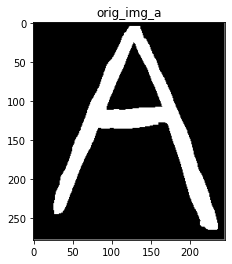

In [1]:
# CMPT 727 PA2
# Gibbs sampling algorithm to denoise an image
# Author : Gunaa AV, Isaac Caswell
# Edits : Heng Liu
# Date : 3/1/2020

import math
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

MAX_BURNS = 50
MAX_SAMPLES = 200
ETA = 1
BETA = 1


def denoise_image(filename, initialization='rand', logfile=None):
  y = read_txt_file(filename)
  x = np.copy(y)
  total_samples = np.zeros(y.shape)
 
  str1=[]
  str2=[]
  str3=[]
    
  
  if initialization == 'rand':
      new_y= np.random.choice([1, -1], size=((y.shape[0]-1-1)*(y.shape[1]-1-1)))
  elif(initialization == 'neg'):
      new_y = -y[np.where(y != 0)]
  else:
      new_y = y[np.where(y != 0)]
  

  y[np.where(y != 0)]= new_y
  
  if(logfile != None):
      with open(logfile, 'w') as log:
        
        
          for epoch in range(MAX_BURNS):
              for column in range(y.shape[0]-1):
                  for row in range(y.shape[1]-1):
                      if(0 < column and 0 < row ):
                          nbr = []
                          nbr.append(y[column-1][row])
                          nbr.append(y[column][row-1])
                          nbr.append(y[column][row+1])
                          nbr.append(y[column+1][row])
                          nbr.append(x[column][row])
                          probalility_y1 = np.exp(2*BETA*(sum(nbr)))/(1+np.exp(2*BETA*(sum(nbr))))
                          if random.random() < probalility_y1:
                              y[column][row] = 1
                          else:
                              y[column][row] = -1
              if(logfile != None):
                  str1 = epoch+1
                  str2 = "B"
                  str3 = (-1*(np.sum(x*y) + np.sum(y[:y.shape[0]-1, :]*y[1:, :])+ np.sum(y[:, :y.shape[1]-1]*y[:, 1:])))
                  log.write("\t".join(map(str, [str1, str3, str2])) + "\n")
                
          for epoch in range(MAX_SAMPLES):
              y_sample = np.zeros(y.shape)
              for column in range(y.shape[0]-1):
                  for row in range(y.shape[1]-1):
                      if(0 < column and 0 < row ):
                          nbr = []
                          nbr.append(y[column-1][row])
                          nbr.append(y[column][row-1])
                          nbr.append(y[column][row+1])
                          nbr.append(y[column+1][row])
                          nbr.append(x[column][row])
                          probalility_y1 = np.exp(2*BETA*(sum(nbr)))/(1+np.exp(2*BETA*(sum(nbr))))
                          if random.random() < probalility_y1:
                              y_sample[column][row] = 1
                          else:
                              y_sample[column][row] = -1
              total_samples = total_samples+(y_sample==1)
              if(logfile != None):
                  str1 = MAX_BURNS+epoch+1
                  str2 = "S"
                  str3 = (-1*(np.sum(x*y_sample) + np.sum(y_sample[:y_sample.shape[0]-1, :]*y_sample[1:, :])+ np.sum(y_sample[:, :y_sample.shape[1]-1]*y_sample[:, 1:])))
                  log.write("\t".join(map(str, [str1, str3, str2])) + "\n")
      return total_samples/MAX_SAMPLES   





  else:
      for epoch in range(MAX_BURNS):
          for column in range(y.shape[0]-1):
              for row in range(y.shape[1]-1):
                  if(0 < column and 0 < row ):
                      nbr = []
                      nbr.append(y[column-1][row])
                      nbr.append(y[column][row-1])
                      nbr.append(y[column][row+1])
                      nbr.append(y[column+1][row])
                      nbr.append(x[column][row])
                      probalility_y1 = np.exp(2*BETA*(sum(nbr)))/(1+np.exp(2*BETA*(sum(nbr))))
                      if random.random() < probalility_y1:
                          y[column][row] = 1
                      else:
                          y[column][row] = -1

      for epoch in range(MAX_SAMPLES):
          y_sample = np.zeros(y.shape)
          for column in range(y.shape[0]-1):
              for row in range(y.shape[1]-1):
                  if(0 < column and 0 < row ):
                      nbr = []
                      nbr.append(y[column-1][row])
                      nbr.append(y[column][row-1])
                      nbr.append(y[column][row+1])
                      nbr.append(y[column+1][row])
                      nbr.append(x[column][row])
                      probalility_y1 = np.exp(2*BETA*(sum(nbr)))/(1+np.exp(2*BETA*(sum(nbr))))
                      if random.random() < probalility_y1:
                          y_sample[column][row] = 1
                      else:
                          y_sample[column][row] = -1
          total_samples = total_samples+(y_sample==1)
      
    
    
      denoised = total_samples/float(MAX_SAMPLES)
      denoised_shape = np.zeros(denoised.shape)
      denoised_shape[np.where(denoised < .5)] = 1
      return denoised_shape


    
    



# ===========================================
# Helper functions
# ===========================================

def plot_energy(filename):
    '''
  filename: a file with energy log, each row should have three terms separated
    by a \t:
      iteration: iteration number
      energy: the energy at this iteration
      S or B: indicates whether it's burning in or a sample
  e.g.
      1   -202086.0   B
      2   -210446.0   S
      ...
  '''

    (its_burn, energies_burn) = ([], [])
    (its_sample, energies_sample) = ([], [])
    with open(filename, 'r') as f:
        for line in f:
            (it, en, phase) = line.strip().split()
            if phase == 'B':
                its_burn.append(float(it))
                energies_burn.append(float(en))
            elif phase == 'S':
                its_sample.append(float(it))
                energies_sample.append(float(en))
            else:
                print('bad phase: -%s-' % phase)

    (p1, ) = plt.plot(its_burn, energies_burn, 'r')
    (p2, ) = plt.plot(its_sample, energies_sample, 'b')
    plt.title(filename)
    plt.legend([p1, p2], ['burn in', 'sampling'])
    plt.savefig(filename)
    plt.close()


def read_txt_file(filename):
    '''
  filename: image filename in txt
  return:   2-d array image
  '''

    f = open(filename, 'r')
    lines = f.readlines()
    height = int(lines[0].split()[1].split('=')[1])
    width = int(lines[0].split()[2].split('=')[1])
    Y = [[0] * (width + 2) for i in range(height + 2)]
    print(np.shape(Y))
    for line in lines[2:]:
        (i, j, val) = [int(entry) for entry in line.split()]
        Y[i + 1][j + 1] = val
    return np.array(Y)


def convert_to_png(denoised_image, title):
    '''
  save array as a png figure with given title.
  '''

    plt.imshow(denoised_image, cmap=plt.cm.gray)
    plt.title(title)
    plt.savefig(title + '.png')


def text_to_png(imagefile):
    imageData = read_txt_file(imagefile)
    imageData = .5 * (1 - imageData)
    convert_to_png(imageData, imagefile)


def get_error(img_a, img_b):
    '''
  compute the fraction of all pixels that differ between the two input images.
  '''

    N = len(img_b[0]) * len(img_b) * 1.0
    return sum([sum([(1 if img_a[row][col] != img_b[row][col] else 0)
               for col in range(len(img_a[0]))]) for row in
               range(len(img_a))]) / N


def run_q2():
    '''
  Run denoise_image function with different initialization and plot out the
  energy functions.
  '''

    global denoised_a

    denoise_image('a_noise10.png.txt', initialization='rand',
                  logfile='log_rand')
    denoise_image('a_noise10.png.txt', initialization='neg',
                  logfile='log_neg')
    denoised_a = denoise_image('a_noise10.png.txt',
                               initialization='same', logfile='log_same'
                               )

  # plot out the energy functions

    plot_energy('log_rand')
    plot_energy('log_neg')
    plot_energy('log_same')


def run_q3():
    '''
  Prerequisite: denoised_a result from run_q2
  Run denoise_image function with two different pics, and
  report the errors between denoised images and original image
  '''

    global denoised_b
    denoised_b = denoise_image('b_noise10.png.txt',
                               initialization='same', logfile=None)
    orig_img_a = read_txt_file('a.png.txt')
    orig_img_a = .5 * (1 - orig_img_a)
    orig_img_b = read_txt_file('b.png.txt')
    orig_img_b = .5 * (1 - orig_img_b)
    #save denoised images and original image to png figures

    convert_to_png(denoised_b, 'denoised_b')
    convert_to_png(denoised_a, 'denoised_a')
    convert_to_png(orig_img_b, 'orig_img_b')
    convert_to_png(orig_img_a, 'orig_img_a')

    (N, M) = orig_img_a.shape
    print('restoration error for image a : %f' % (
            np.sum((orig_img_a != denoised_a)[1:N - 1, 1:M - 1])
            / float((N - 1) * (M - 1))))
    (N, M) = orig_img_b.shape
    print('restoration error for image b : %f' % (
            np.sum((orig_img_b != denoised_b)[1:N - 1, 1:M - 1])
            / float((N - 1) * (M - 1))))


if __name__ == "__main__":
    '''
    TODO modify or use run_q2() and run_q3() to
    run your implementation for this assignment.
    run_q2()
    run_q3()'''
    run_q2()
    print('_______________')
    run_q3()